In [1]:
import openpyxl
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import time

In [2]:
orders_file = 'data/orders.xlsx'
workbook = openpyxl.load_workbook(orders_file)

In [3]:
sheetnames= workbook.get_sheet_names()
print(sheetnames)

['Microsofts', 'Netflix']


C:\Users\Thumbby\AppData\Local\Temp\ipykernel_11172\2214667223.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  sheetnames= workbook.get_sheet_names()


In [4]:
sheetMSFT = workbook.worksheets[0]
sheetNFLX = workbook.worksheets[1]
sheetMSFTNAME = sheetMSFT.title
sheetNFLXNAME = sheetNFLX.title
print(sheetMSFTNAME)
print(sheetNFLXNAME)

Microsofts
Netflix


In [5]:
# excelbids = defaultdict(lambda:defaultdict(list))
'''excelbids['BATS'] = {}
excelbids['BATS'][sheetMSFTNAME] = defaultdict(list)
excelbids['BATS'][sheetNFLXNAME] = defaultdict(list)
excelbids['NASD'] = {}
excelbids['NASD'][sheetMSFTNAME] = defaultdict(list)
excelbids['NASD'][sheetNFLXNAME] = defaultdict(list)'''
# excelasks = defaultdict(lambda:defaultdict(list))
'''excelasks['BATS'] = {}
excelasks['BATS'][sheetMSFTNAME] = defaultdict(list)
excelasks['BATS'][sheetNFLXNAME] = defaultdict(list)
excelasks['NASD'] = {}
excelasks['NASD'][sheetMSFTNAME] = defaultdict(list)
excelasks['NASD'][sheetNFLXNAME] = defaultdict(list)'''


"excelasks['BATS'] = {}\nexcelasks['BATS'][sheetMSFTNAME] = defaultdict(list)\nexcelasks['BATS'][sheetNFLXNAME] = defaultdict(list)\nexcelasks['NASD'] = {}\nexcelasks['NASD'][sheetMSFTNAME] = defaultdict(list)\nexcelasks['NASD'][sheetNFLXNAME] = defaultdict(list)"

In [6]:
# Get the dictionary of price-to-qunatity
excelbids = defaultdict(lambda:defaultdict(list))
excelasks = defaultdict(lambda:defaultdict(list))
for i in range(0,100):
	exchanger_name = "Exchanger"+str(i)
	for _ in range(0, 5):
		excelbids['Microsofts'][round(random.uniform(183.5, 184.5), 2)].append([exchanger_name,random.randint(100, 500)])
		excelasks['Microsofts'][round(random.uniform(183.5, 184.5), 2)].append([exchanger_name,random.randint(100, 500)])
'''for i in range(3, 8):
	for j in range(1, 2):
		excelbids[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])

for i in range (10, 15):
	for j in range(1, 2):
		excelbids[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])

for i in range(3, 8):
	for j in range(1, 2):
		excelbids[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])

for i in range (10, 15):
	for j in range(1, 2):
		excelbids[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])
	for j in range(3, 4):
		excelasks[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])'''

"for i in range(3, 8):\n\tfor j in range(1, 2):\n\t\texcelbids[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])\n\tfor j in range(3, 4):\n\t\texcelasks[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])\n\nfor i in range (10, 15):\n\tfor j in range(1, 2):\n\t\texcelbids[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])\n\tfor j in range(3, 4):\n\t\texcelasks[sheetMSFTNAME][sheetMSFT.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).value])\n\nfor i in range(3, 8):\n\tfor j in range(1, 2):\n\t\texcelbids[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])\n\tfor j in range(3, 4):\n\t\texcelasks[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['NASD',sheetMSFT.cell(i, j+1).value])\n\nfor i in range (10, 15):\n\tfor j in range(1, 2):\n\t\texcelbids[sheetNFLXNAME][sheetNFLX.cell(i, j).value].append(['BATS',sheetMSFT.cell(i, j+1).v

In [7]:
def smart_order_router(side, symbol, qty, order_type='market', price=None):
    needed_qty = qty
    route = {}
    available_qty = 0
    if side == 'buy':
        ask_shared = sorted(excelasks[symbol].items())
        for shared in ask_shared:
            if qty <= 0:
                break
            ask_price = shared[0]
            order_info = shared[1]
            if order_type == 'market' or ask_price <= price:
                for order in order_info:
                    exchanger = order[0]
                    ask_qty = order[1]
                    if exchanger not in route:
                        route[exchanger] = {}
                    if ask_qty >= qty and qty>0:
                        route[exchanger][ask_price] = qty
                        available_qty += qty
                        qty = 0
                    elif qty > 0:
                        route[exchanger][ask_price] = ask_qty
                        available_qty += ask_qty
                        qty = qty - ask_qty
    elif side == 'sell':
        bid_shared = sorted(excelbids[symbol].items(), reverse = True)
        for shared in bid_shared:
            if qty <= 0:
                break
            bid_price = shared[0]
            order_info = shared[1]
            if order_type == 'market' or bid_price >= price:
                for order in order_info:
                    exchanger = order[0]
                    bid_qty = order[1]
                    if exchanger not in route:
                        route[exchanger] = {}
                    if bid_qty >= qty and qty>0:
                        route[exchanger][bid_price] = qty
                        available_qty += qty
                        qty = 0
                    elif qty > 0:
                        route[exchanger][bid_price] = bid_qty
                        available_qty += bid_qty
                        qty = qty - bid_qty
    order = {'route':route, 'leave_qty':needed_qty - available_qty}
    return order    

In [8]:
qty = random.randint(1000, 5000)
limit_price = round(random.uniform(183.5, 184.5), 2)
route = smart_order_router('buy', 'Microsofts', qty, 'limit', limit_price)
print(f'This investor want to buy {qty} shared at {limit_price} price')
print(route)

This investor want to buy 3060 shared at 184.25 price
{'route': {'Exchanger19': {183.5: 476}, 'Exchanger17': {183.51: 372}, 'Exchanger47': {183.51: 214}, 'Exchanger93': {183.51: 177}, 'Exchanger9': {183.52: 112}, 'Exchanger43': {183.52: 385}, 'Exchanger48': {183.52: 443}, 'Exchanger54': {183.52: 390}, 'Exchanger14': {183.53: 287}, 'Exchanger29': {183.53: 204}, 'Exchanger33': {}, 'Exchanger49': {}, 'Exchanger64': {}, 'Exchanger69': {}, 'Exchanger74': {}, 'Exchanger80': {}}, 'leave_qty': 0}


In [9]:
qty = random.randint(1000, 5000)
limit_price = round(random.uniform(183.5, 184.5), 2)
route = smart_order_router('sell', 'Microsofts', qty, 'limit', limit_price)
print(f'This investor want to sell {qty} shared at {limit_price} price')
print(route)

This investor want to sell 2996 shared at 184.17 price
{'route': {'Exchanger9': {184.49: 471}, 'Exchanger39': {184.49: 394}, 'Exchanger44': {184.49: 422}, 'Exchanger52': {184.49: 471}, 'Exchanger68': {184.49: 448}, 'Exchanger14': {184.48: 314}, 'Exchanger30': {184.48: 203}, 'Exchanger37': {184.48: 273}}, 'leave_qty': 0}


In [10]:
# buy test
buy_times = []
buy_counts = []
step = 0
for i in range(100, 1000, 100):
    start_time = time.time()
    for order_count in range(0, i):
        qty = random.randint(1000, 5000)
        limit_price = round(random.uniform(183.5, 184.5), 2)
        route = smart_order_router('buy', 'Microsofts', qty, 'limit', limit_price)
        '''print(f'This investor want to buy {qty} shared at {limit_price} price')
        print(route)'''
    end_time = time.time()
    buy_times.append(end_time - start_time)
    buy_counts.append(i)

In [11]:
# sell test
sell_times = []
sell_counts = []
step = 0
for i in range(100, 1000, 100):
    start_time = time.time()
    for order_count in range(0, i):
        qty = random.randint(1000, 5000)
        limit_price = round(random.uniform(183.5, 184.5), 2)
        route = smart_order_router('sell', 'Microsofts', qty, 'limit', limit_price)
        '''print(f'This investor want to sell {qty} shared at {limit_price} price')
        print(route)'''
    end_time = time.time()
    sell_times.append(end_time - start_time)
    sell_counts.append(i)

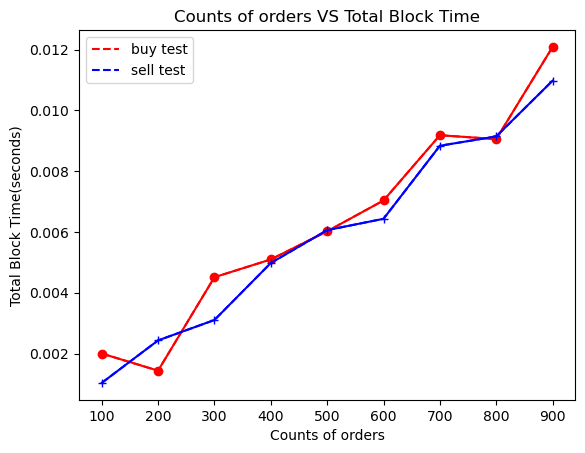

In [12]:
buy_line = plt.plot(buy_counts, buy_times, 'r--', label = 'buy test')
sell_line = plt.plot(sell_counts, sell_times, 'b--', label = 'sell test')
plt.plot(buy_counts, buy_times, 'ro-', sell_counts, sell_times, 'b+-')
plt.title('Counts of orders VS Total Block Time')
plt.xlabel('Counts of orders')
plt.ylabel('Total Block Time(seconds)')
plt.legend()
plt.show()